## Sandip's CNN Model

Based on: https://fairyonice.github.io/achieving-top-23-in-kaggles-facial-keypoints-detection-with-keras-tensorflow.html

This model achieved modest performance in terms of Kaggle's leaderboard, with a top score of 4.15396. 

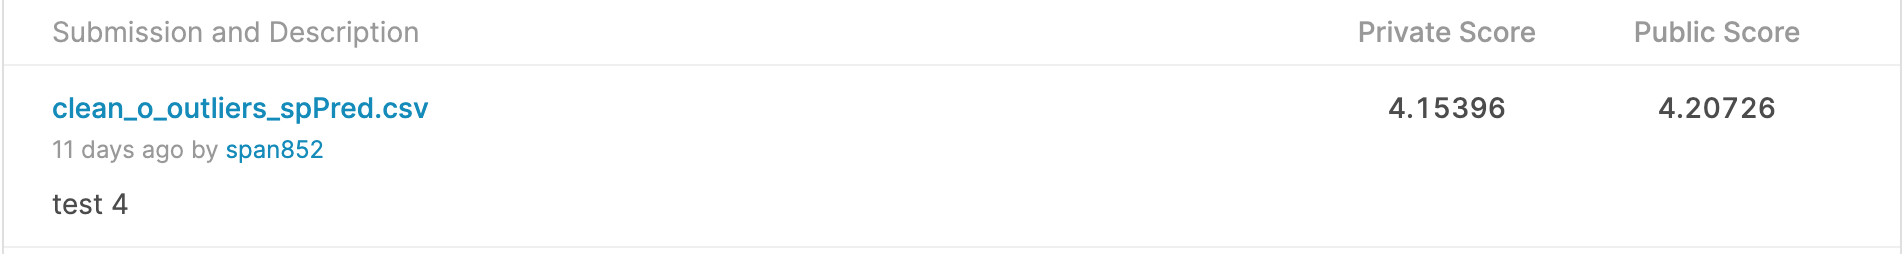




### Set the utils path to point to the utils directory locally

In [ ]:
UTILS_PATH = "utils"

import os, sys
sys.path.append(UTILS_PATH)
from load_models import LoadTrainModels
from predict_models import PredictModels
from transform_data import TransformData
import imp
import pickle
import pandas as pd

### Set the paths of where the clean file(s) are located

In [ ]:
file_path = "cleantrain/"
trainer = LoadTrainModels("data/models3/", file_path)

trainer.print_paths()

### For every version of a clean Train file in a given path, create and save a model

The following cell is a base version.  No transformations to the data were applied and all layers were used from the model.
The following cell produced the prediction with the best result for the clean file named: clean_all_outliers.  This means that the train file that was cleaned by removing all outliers produced the best result with these settings. 

This cell looped through the directory of clean trail files which appears below and created a model for each file. Please refer to the Readme file for more information on each.

![](https://i.imgur.com/S7FhUkH.jpg)

In [ ]:

files = os.listdir(file_path)

#For every version of a cleaned Train file in CleanTrain directory, create and save a model
for filename in files: 
    print("Opening file: ", filename)
    clean_file = "".join((file_path,filename))
    train_data = pickle.load( open( clean_file, "rb" ) )
    train_data = train_data.drop(['level_0', 'check_sum', 'index'], axis=1,errors='ignore')
    print("Train Shape:", train_data.shape)

    filename = str(filename).replace('.p', '').strip()
    print("Begin model and train:")
    model_name = "".join((filename,"_sp"))
    print("Model name:", model_name)
    model, history = trainer.train_model(model_name, train_data, hoizontal_flip=True,verbose = True)
    print("End model and train")    
    print()

### For every model file in a given path, predict using the model and save the predictions in CSV file

Following the cell above, it's now time to make some predictions.  The following cell loops through the directory and 

for each model (json file)
1. Create a prediction.  The predict_standard makes predictions and stores them in a pred_path location speficied.

Note: If you would like to run this cell, please update the paths accordingly. ### For every model file in a given path, predict using the model and save the predictions in CSV file

In [ ]:


id_lookup = pickle.load( open( "data/id_lookup.p", "rb" ) )
test = pickle.load( open( "data/test.p", "rb" ) )

#Using local paths as this is way faster...
file_path = "data/models2/"
pred_path = "data/predictions2/"

predictor = PredictModels(file_path,pred_path , id_lookup)

predictor.print_paths()

files = os.listdir(file_path)
#For every model in file_path, predict using the model and save the predictions in CSV file
for filename in files:
    if ".h5" in filename:
        base_name = filename[:-3]
        model_json = ''.join((base_name,".json"))
        print("Working with: ", base_name)
        print("Begin Predict")
        Y= predictor.predict_standard(base_name, filename, model_json, test)
        print("End model and train")    
        print()


In [ ]:
file_path = "cleantrain/"
trainer = LoadTrainModels("data/models3/", file_path)
transformdata = TransformData()
trainer.print_paths()

### Train the Models Using Transformed Data

This utilizes the transform data function which augments the dataset by concatenating the 7 various datasets with flipped images, essentially doubling the training data. 

In [ ]:
#For every version of a cleaned Train file in CleanTrain directory, create and save a model
for filename in files:
    print("Opening file: ", filename)
    clean_file = "".join((file_path,filename))
    print(clean_file)
    train_data = pickle.load( open(clean_file, "rb" ) )
    train_data = train_data.drop(['level_0', 'check_sum', 'index'], axis=1,errors='ignore')
    print("Train Shape:", train_data.shape)
    filename = str(filename).replace('.p', '').strip()
    print("Begin model and train:")
    model_name = "".join((filename,"_sp"))
    print("Model name:", model_name)

    #Transform the dataset
    flipped = transformdata.FlipHorizontal(train_data)
    train_data = pd.concat([train_data,flipped])
    train_data = transformdata.Bright_Dim(train_data,level_of_brightness = .01)

    #Train the Model using the Flipped Dataset
    model, history = trainer.train_model(model_name, train_data,verbose = True)
    print("End model and train")
    print()

In [ ]:
id_lookup = pickle.load( open( "data/id_lookup.p", "rb" ) )
test = pickle.load( open( "data/test.p", "rb" ) )

#Using local paths as this is way faster...
file_path = "data/models3/"
pred_path = "data/predictions3/"

predictor = PredictModels(file_path,pred_path , id_lookup)

predictor.print_paths()

files = os.listdir(file_path)
#For every model in file_path, predict using the model and save the predictions in CSV file
for filename in files:
    if ".h5" in filename:
        base_name = filename[:-3]
        model_json = ''.join((base_name,".json"))
        print("Working with: ", base_name)
        print("Begin Predict")
        Y= predictor.predict_standard(base_name, filename, model_json, test)
        print("End model and train")    
        print()
